<a href="https://colab.research.google.com/github/TEMADANGSERAPHIN/CahierDeCharge/blob/master/cnn_hack_first_soumis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from google.colab import drive
from glob import glob
import zipfile
import os
import shutil

import matplotlib.pyplot as plt

import torch
from torchvision import transforms
import torchvision

In [3]:
drive.mount('/content/drive')
# Lister les fichiers dans le répertoire Drive
os.listdir('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Test.csv',
 'Train.csv',
 'Images',
 'cnn_hack.ipynb',
 'cnn_hack_first_soumis.ipynb']

In [4]:
# Chemin vers le fichier ZIP sur Google Drive
zip_path = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Images.zip'

# Décompresser le fichier ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras/images')

# Lister les fichiers extraits
#os.listdir('/content/images')


In [5]:
#drive.mount('/content/drive')
# Lister les fichiers dans le répertoire Drive
os.listdir('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras')


['Test.csv',
 'Train.csv',
 'Images',
 'cnn_hack.ipynb',
 'cnn_hack_first_soumis.ipynb',
 'images']

In [6]:
# Chemins vers les fichiers
project_dir = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras'
train_csv_path = os.path.join(project_dir, 'Train.csv')
test_csv_path = os.path.join(project_dir, 'Test.csv')
images_dir = os.path.join(project_dir, 'images/')

In [7]:
# Chargement des fichiers CSV
train_data = pd.read_csv(train_csv_path)
train_data.head()

,Image_id,Label
0,id_004wknd7qd.jpg,blast
1,id_004wknd7qd_rgn.jpg,blast
2,id_005sitfgr2.jpg,brown
3,id_005sitfgr2_rgn.jpg,brown
4,id_00stp9t6m6.jpg,blast


In [8]:
train_data.shape

(5340, 2)

In [9]:
test_data = pd.read_csv(test_csv_path)
test_data.head()

,Image_id
0,id_00vl5wvxq3.jpg
1,id_00vl5wvxq3_rgn.jpg
2,id_01hu05mtch.jpg
3,id_01hu05mtch_rgn.jpg
4,id_030ln10ewn.jpg


In [10]:
test_data.shape

(2290, 1)

In [11]:
train_data['Label'].value_counts().reset_index(name='count')

,Label,count
0,blast,2988
1,brown,1532
2,healthy,820


In [12]:
train_data['Label'].value_counts().sum()

5340

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5340 entries, 0 to 5339
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image_id  5340 non-null   object
 1   Label     5340 non-null   object
dtypes: object(2)
memory usage: 83.6+ KB


In [16]:
image = glob('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras/images/*jpg')

In [17]:
image[0]

'/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras/images/id_004wknd7qd.jpg'

array([[[ 76, 109,  90],
        [140, 173, 152],
        [151, 186, 164],
        ...,
        [ 72,  78,  42],
        [ 54,  60,  24],
        [ 53,  59,  23]],

       [[ 81, 114,  95],
        [144, 177, 156],
        [155, 188, 167],
        ...,
        [ 61,  69,  32],
        [ 52,  60,  23],
        [ 56,  64,  27]],

       [[ 89, 120, 102],
        [147, 180, 159],
        [156, 189, 168],
        ...,
        [ 52,  63,  23],
        [ 52,  63,  23],
        [ 60,  71,  31]],

       ...,

       [[198, 211, 142],
        [192, 205, 136],
        [180, 191, 122],
        ...,
        [177, 170,  90],
        [177, 168,  89],
        [177, 170,  90]],

       [[196, 209, 140],
        [190, 203, 134],
        [178, 189, 121],
        ...,
        [186, 172, 101],
        [189, 172, 102],
        [190, 176, 105]],

       [[195, 208, 139],
        [189, 202, 133],
        [176, 187, 119],
        ...,
        [194, 175, 109],
        [196, 177, 111],
        [198, 179, 113]]], dtype=uint8)
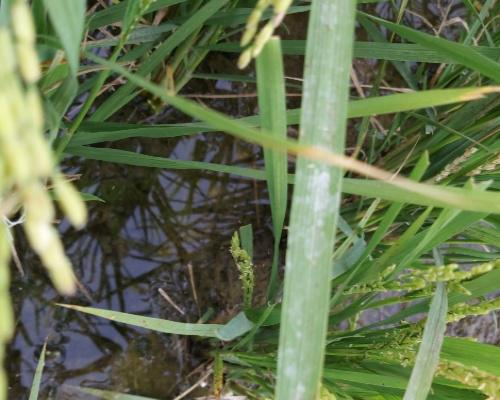

In [18]:
plt.imread(image[0])

array([[[ 76, 109,  90],
        [140, 173, 152],
        [151, 186, 164],
        ...,
        [ 72,  78,  42],
        [ 54,  60,  24],
        [ 53,  59,  23]],

       [[ 81, 114,  95],
        [144, 177, 156],
        [155, 188, 167],
        ...,
        [ 61,  69,  32],
        [ 52,  60,  23],
        [ 56,  64,  27]],

       [[ 89, 120, 102],
        [147, 180, 159],
        [156, 189, 168],
        ...,
        [ 52,  63,  23],
        [ 52,  63,  23],
        [ 60,  71,  31]],

       ...,

       [[198, 211, 142],
        [192, 205, 136],
        [180, 191, 122],
        ...,
        [177, 170,  90],
        [177, 168,  89],
        [177, 170,  90]],

       [[196, 209, 140],
        [190, 203, 134],
        [178, 189, 121],
        ...,
        [186, 172, 101],
        [189, 172, 102],
        [190, 176, 105]],

       [[195, 208, 139],
        [189, 202, 133],
        [176, 187, 119],
        ...,
        [194, 175, 109],
        [196, 177, 111],
        [198, 179, 113]]], dtype=uint8)
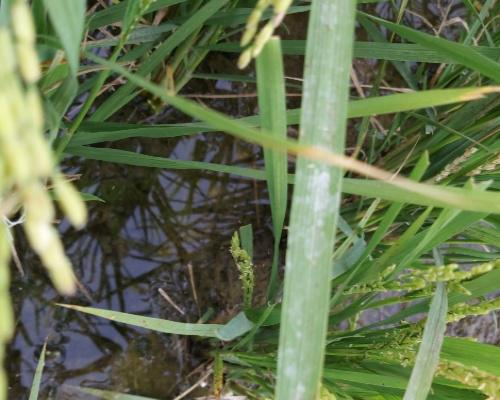

In [19]:
plt.imread(image[0])

### **EXPLORATIONS DES IMAGES**

In [27]:
# Créer un Dataset personnalisé
class RiceDiseaseDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)  # Charger Train.csv
        self.root_dir = root_dir  # Dossier contenant les images
        self.transform = transform

        # Mapping des labels à des valeurs numériques
        self.label_map = {'blast': 0, 'brown': 1, 'healthy': 2}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Récupérer l'ID de l'image et le label depuis le CSV
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = self.data.iloc[idx, 1]

        # Charger l'image
        image = Image.open(img_name)

        # Appliquer les transformations si elles sont définies
        if self.transform:
            image = self.transform(image)

        # Convertir le label en une valeur numérique
        label = self.label_map[label]

        return image, label

In [28]:
mean = [0.2981, 0.3591, 0.4368]
std = [0.1608, 0.2399, 0.1764]

images_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [29]:
# Chemin vers le fichier CSV et le dossier d'images
csv_file = train_csv_path
image_folder = images_dir

In [30]:
dataset = RiceDiseaseDataset(csv_file=csv_file, root_dir=image_folder, transform=images_transform)

In [31]:
def show_transformed_image(dataset):
  loader = DataLoader(dataset, batch_size=6, shuffle=True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow=3)
  plt.figure(figsize=(11, 11))


  plt.imshow(np.transpose(grid, (1, 2, 0)))
  print('labels: ', labels)

labels:  tensor([0, 0, 0, 1, 0, 1])


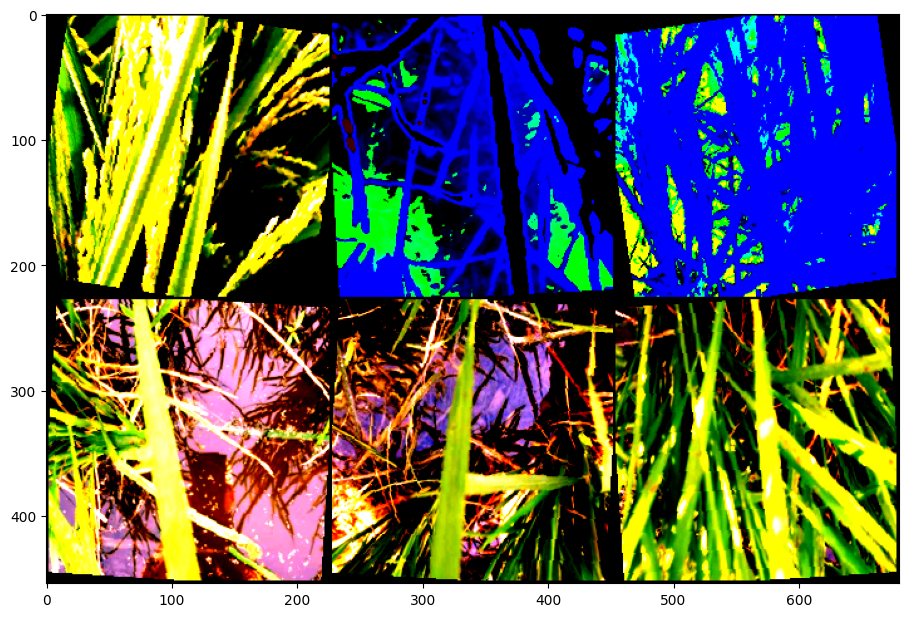

In [32]:
show_transformed_image(dataset)

#### **USE MODELE**

In [34]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# from torchvision import datasets, models, transforms
# import pandas as pd
# from PIL import Image
# import os


In [35]:
# class RiceDataset(Dataset):
#     def __init__(self, csv_file, img_dir, transform=None):
#         self.annotations = pd.read_csv(csv_file)
#         self.img_dir = img_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.annotations)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
#         image = Image.open(img_path).convert("RGB")
#         label = self.annotations.iloc[idx, 1]

#         label_map = {"blast": 0, "brown": 1, "healthy": 2}
#         label = label_map[label]

#         if self.transform:
#             image = self.transform(image)

#         return image, label


In [36]:
# # Chargement des données
# train_dataset = RiceDataset(csv_file=csv_file, img_dir=images_dir, transform=images_transform)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [37]:
# def train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     best_acc = 0
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         correct = 0
#         total = 0

#         for images, labels in train_loader:
#             images = images.to(device)
#             labels = labels.to(device)

#             # Forward pass
#             outputs = model(images)
#             loss = loss_fn(outputs, labels)

#             # Backward pass and optimization
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#         epoch_loss = running_loss / len(train_loader)
#         epoch_acc = 100 * correct / total

#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

#         # Évaluation sur l'ensemble de validation
#         val_dataset_acc = evaluate_model(model, val_loader)

#         # Sauvegarder le modèle si la précision sur l'ensemble de validation est meilleure
#         if val_dataset_acc > best_acc:
#             best_acc = val_dataset_acc
#             save_checkpoint(model, epoch, optimizer, best_acc)

#     print("Finished Training")
#     return model

In [38]:
# from torch.utils.data import random_split

# # Fraction de données à utiliser pour la validation (par exemple 20%)
# validation_split = 0.4

# # Longueur des ensembles d'entraînement et de validation
# train_size = int((1 - validation_split) * len(train_dataset))
# val_size = len(train_dataset) - train_size

# # Diviser le dataset en ensembles d'entraînement et de validation
# train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# # Créer des DataLoaders pour l'entraînement et la validation
# train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
# val_loader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)

In [39]:


# # Charger le modèle ResNet18 pré-entraîné
# model = models.resnet18(pretrained=True)

# # Modifier la dernière couche pour qu'elle corresponde au nombre de classes (3 dans votre cas)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 3)

# # Déplacer le modèle sur le GPU si disponible
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Définir la fonction de perte et l'optimiseur
# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [40]:
# def evaluate_model(model, val_loader):
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images = images.to(device)
#             labels = labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     epoch_acc = 100 * correct / total
#     print(f'Validation Accuracy: {epoch_acc:.2f}%')
#     return epoch_acc


In [41]:
# def save_checkpoint(model, epoch, optimizer, best_acc):
#     checkpoint = {
#         'epoch': epoch + 1,
#         'model': model.state_dict(),
#         'best_accuracy' : best_acc,
#         'optimizer': optimizer.state_dict(),
#         'comments' : 'very cool model'
#     }

#     torch.save(checkpoint, 'model_best_checkpoit2c.pth.tar')

In [42]:
# train_model(model, train_loader, val_loader, loss_fn, optimizer, 10)

In [43]:
# checkpoint = torch.load('model_best_checkpoit2c.pth.tar')

In [44]:
# print(checkpoint['epoch'])
# print(checkpoint['comments'])
# print(checkpoint['best_accuracy'])

In [45]:
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
# ])

In [46]:
# csv_file_test = test_csv_path


In [47]:
# import os
# import pandas as pd
# from PIL import Image
# from torch.utils.data import Dataset

# class RiceTestDataset(Dataset):
#     def __init__(self, csv_file, img_dir, transform=None):
#         # Charger le fichier CSV qui contient les identifiants d'images
#         self.test_data = pd.read_csv(csv_file)
#         self.img_dir = img_dir  # Répertoire contenant les images
#         self.transform = transform  # Transformations à appliquer (normalisation, resize, etc.)

#     def __len__(self):
#         # Retourner la taille du dataset
#         return len(self.test_data)

#     def __getitem__(self, idx):
#         # Obtenir l'identifiant de l'image à partir du fichier CSV
#         img_id = self.test_data.iloc[idx, 0]
#         img_path = os.path.join(self.img_dir, img_id)

#         # Charger l'image en utilisant PIL
#         image = Image.open(img_path).convert("RGB")

#         # Appliquer des transformations si définies
#         if self.transform:
#             image = self.transform(image)

#         # Retourner l'image et son identifiant
#         return {'image': image, 'image_id': img_id}

In [48]:

# # Charger le modèle ResNet18 avec les poids pré-entraînés
# resnet18_model = models.resnet18(pretrained=True)
# num_ftrs = resnet18_model.fc.in_features
# resnet18_model.fc = torch.nn.Linear(num_ftrs, 3)


# resnet18_model.load_state_dict(checkpoint['model'])

# torch.save(resnet18_model.state_dict(), 'best_model2c.pth')

# # Charger les poids sauvegardés
# resnet18_model.load_state_dict(torch.load('best_model2c.pth'))

# # Mettre le modèle en mode évaluation
# resnet18_model.eval()

# # Envoyer le modèle sur l'appareil (CPU ou GPU)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# resnet18_model.to(device)


In [49]:
# os.listdir('/content/drive/My Drive/DataScience Hack Projets/Hackaton/')

In [50]:
# dt = pd.read_csv('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Test.csv')
# dt.head()

In [51]:
# from torch.utils.data import DataLoader

# # Chemin vers le fichier CSV de test
# test_csv_path = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Test.csv'

# # Chemin vers le répertoire d'images de test
# images_dir = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/images'

# # Créer le dataset de test
# test_dataset = RiceTestDataset(csv_file=test_csv_path, img_dir=images_dir, transform=transform)

# # Créer le DataLoader pour charger les données par lots
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [52]:
# # Assumer que le DataLoader est déjà défini (test_loader)
# all_predictions = []
# all_image_ids = []

In [53]:
# # Assure-toi que toutes les images sont chargées correctement
# print(f"Nombre d'images dans le DataLoader: {len(test_loader.dataset)}")


In [54]:
# # Assurer que le modèle est en mode évaluation (pour désactiver dropout, batchnorm, etc.)
# resnet18_model.eval()

# # Déplacer le modèle vers l'appareil GPU si disponible
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# resnet18_model.to(device)

# all_predictions = []
# all_image_ids = []


In [55]:
# import torch
# import pandas as pd

# # Assurer que le modèle est en mode évaluation (pour désactiver dropout, batchnorm, etc.)
# resnet18_model.eval()

# # Déplacer le modèle vers l'appareil GPU si disponible
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# resnet18_model.to(device)

# all_predictions = []
# all_image_ids = []

# # Désactiver le calcul des gradients pour les prédictions
# with torch.no_grad():
#     for batch in test_loader:
#         images = batch['image'].to(device)  # Envoyer les images sur l'appareil GPU/CPU
#         image_ids = batch['image_id']  # Récupérer les identifiants d'image

#         # Obtenir les prédictions du modèle
#         outputs = resnet18_model(images)

#         # Convertir les sorties en probabilités avec softmax
#         probabilities = torch.softmax(outputs, dim=1)

#         # Déplacer les probabilités et les identifiants d'images vers le CPU
#         probabilities = probabilities.cpu().numpy()
#         image_ids = list(image_ids)  # Convertir les identifiants en une liste Python

#         # Stocker les probabilités et les identifiants dans des listes
#         all_predictions.extend(probabilities)
#         all_image_ids.extend(image_ids)


In [56]:
# # Nom des classes
# class_names = ['blast', 'brown', 'healthy']

# # Créer une DataFrame avec les résultats
# submission_data = {
#     'image_id': all_image_ids,  # Ajouter les identifiants d'images
#     'blast': [pred[0] for pred in all_predictions],  # Probabilité pour la classe 'blast'
#     'brown': [pred[1] for pred in all_predictions],  # Probabilité pour la classe 'brown'
#     'healthy': [pred[2] for pred in all_predictions]  # Probabilité pour la classe 'healthy'
# }

# # Convertir en DataFrame Pandas
# submission_df = pd.DataFrame(submission_data)

# # Sauvegarder le fichier de soumission au format CSV
# submission_df.to_csv('submission2c.csv', index=False)


In [57]:
# b_sub = pd.read_csv('submission2c.csv')
# b_sub.head()

In [58]:
# b_sub = pd.read_csv('submission2c.csv')
# b_sub.head()

In [59]:
# b_sub.shape

### Autres methode

In [60]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Make sure Keras is lowercase

In [61]:
import pandas as pd

# Charger le fichier CSV contenant les identifiants d'images et leurs labels
train_df = pd.read_csv('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras/Train.csv')
# Afficher un aperçu des données
print(train_df.head())


                Image_id  Label
0      id_004wknd7qd.jpg  blast
1  id_004wknd7qd_rgn.jpg  blast
2      id_005sitfgr2.jpg  brown
3  id_005sitfgr2_rgn.jpg  brown
4      id_00stp9t6m6.jpg  blast


In [62]:
print(train_df.columns)

Index(['Image_id', 'Label'], dtype='object')


In [63]:
# Définir l'augmentation pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Utiliser une fraction des données pour la validation
)

# Pas d'augmentation pour les données de validation, seulement le rescaling
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


In [64]:
# Répertoire où se trouvent les images
image_dir = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Tensorflow_Keras/images'

# Préparer le générateur d'images d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='Image_id',
    y_col='Label',
    target_size=(225, 225),  # Taille des images (à ajuster selon ton modèle)
    batch_size=32,
    class_mode='categorical',  # Comme il s'agit de classification multiclasse
    subset='training',  # Utiliser uniquement la partie 'training'
    shuffle=True
)

# Préparer le générateur d'images de validation
validation_generator = val_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='Image_id',
    y_col='Label',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Utiliser la partie 'validation'
    shuffle=False
)


Found 4272 validated image filenames belonging to 3 classes.
Found 1602 validated image filenames belonging to 3 classes.


In [65]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [66]:
import tensorflow as tf

model = tf.keras.Sequential()

# Première couche convolutive avec input_shape spécifié dans Conv2D
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))


# Deuxième couche convolutive
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

# Aplatir les sorties des couches convolutionnelles pour les utiliser dans des couches Dense
model.add(tf.keras.layers.Flatten())

# Couche Dense entièrement connectée
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Dernière couche pour la classification des 3 classes avec softmax
model.add(tf.keras.layers.Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
# Résumé du modèle
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    verbose=1,
    validation_data=validation_generator
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.3754 - loss: 6.8964 - val_accuracy: 0.5581 - val_loss: 0.9858
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.5584 - loss: 0.9943 - val_accuracy: 0.5799 - val_loss: 0.9503
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.5708 - loss: 0.9840 - val_accuracy: 0.5724 - val_loss: 0.9627
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.5323 - loss: 0.9653 - val_accuracy: 0.5780 - val_loss: 0.9371
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 160s 8s/step - accuracy: 0.5935 - loss: 0.9295 - val_accuracy: 0.5905 - val_loss: 0.9374
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step - accuracy: 0.5786 - loss: 0.9281 - val_accuracy: 0.5849 - val_loss: 0.9242
Epoch 7/50
14/20 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5314 - loss: 0.9476

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 109s 6s/step - accuracy: 0.5407 - loss: 0.9448 - val_accuracy: 0.5574 - val_loss: 0.9500
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 180s 7s/step - accuracy: 0.5728 - loss: 0.9072 - val_accuracy: 0.5768 - val_loss: 0.9338
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.5927 - loss: 0.9415 - val_accuracy: 0.5818 - val_loss: 0.8995
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.6347 - loss: 0.8917 - val_accuracy: 0.6130 - val_loss: 0.8770
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.5492 - loss: 0.9111 - val_accuracy: 0.5899 - val_loss: 0.9251
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 160s 8s/step - accuracy: 0.5897 - loss: 0.9337 - val_accuracy: 0.6005 - val_loss: 0.8907
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.5548 - loss: 0.9246 - val_accuracy: 0.6161 - val_loss: 0.8835
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 109s 6s/step - accuracy: 0.5999 - loss: 0.9266 - val_accuracy: 0.5818 - val_los

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/DataScience Hack Projets/Hackaton/Test.csv')
image_dir = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Images/'
test_df.head()

In [ ]:
image_dir = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Images/'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# # Chemin du dossier contenant les images
# image_dir = '/content/drive/My Drive/DataScience Hack Projets/Hackaton/Images'

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(image_id, target_size=(225, 225)):
    # Charger l'image à partir de son chemin
    image_path = image_dir + image_id
    img = load_img(image_path, target_size=target_size)  # Charger et redimensionner l'image
    img_array = img_to_array(img)  # Convertir l'image en tableau NumPy
    img_array = img_array / 255.0  # Normaliser l'image (optionnel, selon le prétraitement attendu)
    return img_array

# Appliquer cette fonction à toutes les images de test
test_images = np.array([load_and_preprocess_image(image_id) for image_id in test_df['Image_id']])

# Faire des prédictions sur l'ensemble de test
test_predictions = model.predict(test_images)

# Créer le fichier de soumission avec les probabilités
test_df[['blast', 'brown', 'healthy']] = test_predictions
test_df.to_csv('submission.csv', index=False)


In [ ]:
sub_data = pd.read_csv('submission.csv')
sub_data.head()

In [ ]:
sub_data.shape